<a href="https://colab.research.google.com/github/XiadaniCue/Simulaci-n-1/blob/main/Cami%C3%B3n_de_Transporte_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Camión de Transporte
**Ejercicio**


1.   La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas. El peso de cada tina sigue la siguiente distribución de probabilidad:
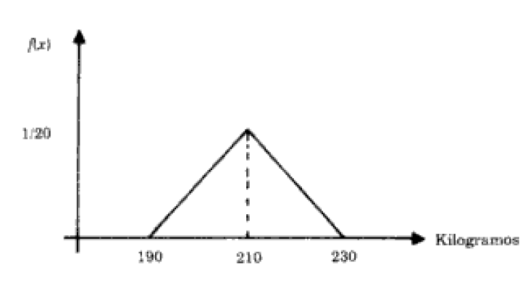

  Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso de las tinas exceda la capacidad del camión?


**a) Analíticamente**

Sea
$$x_i=Tri(a,b,c): peso$$

Nuestra condición es:
$$x_1+ x_2 +x_3 + x_4 +x_5> 1000$$


Calculamos nuestra función de desnsidad de probabilidad:
$$m=\frac{y_2-y_1}{x_2-x_1}= \frac{\frac{1}{20}-0}{210-190}=\frac{\frac{1}{20}}{20}=\frac{1}{400}$$
Entonces
$$(y-y_1)=m(x-x_1)$$
$$y=\frac{1}{400}(x-190)$$

Hacemos lo mismo para la otra
$$m=\frac{y_2-y_1}{x_2-x_1}= \frac{0-\frac{1}{20}}{230-210}=\frac{-\frac{1}{20}}{20}=-\frac{1}{400}$$
Entonces
$$(y-y_2)=m(x-x_2)$$
$$y=-\frac{1}{400}(x-230)$$

Nuestra f(x) no queda:

$$f(x)= \Biggl\{\begin{array}{c} \frac{1}{400}(x-190)~~si~190≤x<210 \\ -\frac{1}{400}(x-230)~~si~210≤x≤230 \end{array}$$

Calculamos su esperanza

$$μ=E(x)=\int_{190}^{230} x f(x) \,dx$$
$$μ=\int_{190}^{210} x \frac{1}{400}(x-190)\,dx + \int_{210}^{230} -x \frac{1}{400}(x-230)\,dx$$
$$=\frac{1}{400}\Biggl(\int_{190}^{210} x^2-190x \,dx - \int_{210}^{230} x^2-230x \,dx \Biggl)$$
$$=\frac{305}{3}+\frac{325}{3}$$
$$μ=210$$


Calculamos la Varianza
$$σ^2=Var(x)=E(x^2)-(E(x))^2$$
Entonces
$$E(x^2)=\int_{190}^{230} x^2 f(x)\,dx $$

$$= \int_{190}^{210} x^2 \frac{1}{400}(x-190)\,dx + \int_{210}^{230} -x^2 \frac{1}{400}(x-230)\,dx$$

$$=\frac{62050}{3}+\frac{70450}{3}= \frac{132500}{3}$$
Por definición
$$Var(x)=E(x^2)-(E(x))^2$$

$$=\frac{132500}{3} - 210^2$$

$$σ^2=Var(x)=66.66$$




Buscamos calcular:
$$P(x_1+x_2+x_3+x_4+x_5>1000)$$

Ocupamos el Teorema del Límite Central
$$\lim_{x\to\infty} P\biggl(\frac{x_1+...+x_n * nμ}{σ\sqrt{n}}<x\biggl)=𝜱(x)$$

$$para~n≥4$$

Sustituimos
$$\frac{x_1+x_2+x_3+x_4+x_5-5(210)}{\sqrt{66.66}\sqrt{5}}<x$$

$$\frac{x_1+x_2+x_3+x_4+x_5 -5(210)}{\sqrt{66.66}\sqrt{5}}<\frac{1000-(5)(210)}{\sqrt{66.66}\sqrt{5}}$$

$$\frac{x_1+x_2+x_3+x_4+x_5 - 1050}{18.2565}<-2.7387$$

$$z<-2.7387$$


Sustituimos en el Teorema
$$P(z<-2.7387)=𝜱(-2.7387)$$

$$P(x_1+x_2+x_3+x_4+x_5 >1000)= 1- 𝜱(-2.7387)$$

$$=0.997=99.7\%$$

Por lo tanto:
$$P(x_1+x_2+x_3+x_4+x_5 >1000)=99.7\%$$

**Existe un 99.7% de probabilidad de que exceda el peso**

**b) Por Simulación**

Por el método de trandformada inversa
Calculamos F(x)
$$F(x)=\int_{-∞}^{x}f(x) \,dx$$
$$=\frac{1}{400}\int_{190}^{x}(x-190)\,dx $$

$$= \frac{1}{400} \biggl(\frac{x^2}{2} - 190 x \biggl)|_{190}^{x}$$

$$=\frac{x^2-380x-36100}{800} =\frac{(x-190)^2}{800}$$

La segunda parte
$$F(x)=-\frac{1}{400}\int_{210}^{x}(x-230)\,dx $$

$$= -\frac{1}{400} \biggl(\frac{x^2}{2} - 230 x \biggl)|_{210}^{x}$$

$$=-\frac{x^2-460x+52500}{800}$$

$$=\frac{1-(230-x)^2}{800}$$

Nuestra F(x) nos queda

$$f(x)= \Biggl\{\begin{array}{c}\frac{(x-190)^2} {800}~~si~190\leq x< 210 \\1-\frac{(230-x)^2}{800}~~si~210≤x≤230 \end{array}$$



Resolvemos
$$F_1(x)=U$$
$$\frac{(x-190)^2}{800}=U$$

$$x=\sqrt{U800}+190$$

$$=\sqrt{2(400)U}+190$$

$$x_1=20\sqrt{2U}+190~si~0\leq x<\frac{1}{2}$$

$$F_2(X)=U$$

$$1-\frac{(230-x)^2}{800}=U$$

$$x=-\sqrt{(U-1)800}+230$$

$$x_2=-20\sqrt{2(U-1)}+230~si~\frac{1}{2}\leq x <1$$

In [100]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math

In [197]:
lista=[]
def inv(n):

  for k in range(n):
    u=rnd.random()
    if u<0.5:
      x=20*math.sqrt(2*u)+190
      lista.append(x)
    elif u>=0.5:
      x=-20*(math.sqrt(2*(1-u)))+230
      lista.append(x)
  return lista

In [198]:
L=inv(5)
print(L)
print(L[0]+L[1]+L[2]+L[3]+L[4])

[203.72122324366975, 217.04122327194796, 213.737955891433, 200.92208027916115, 205.9904549364079]
1041.4129376226197


In [199]:
def trans(m):
  N=m
  lista=[]
  lista2=[]
  contador=0
  for k in range(N):
    for i in range(5):
      L=inv(5)
    #print(L)
    if L[0]+L[1]+L[2]+L[3]+L[4]>1000:
      contador=contador+1
      prob=(contador/N)
      lista2.append(prob)
      return lista2

In [200]:
T=trans(2000)

Text(0.5, 1.0, 'Gráfica de Densidad')

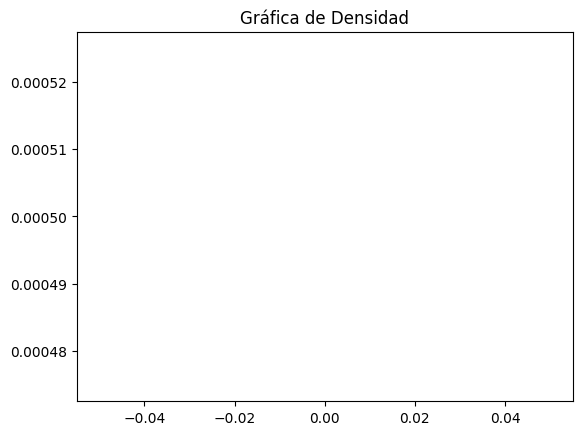

In [201]:
#El histograma nos ordena nuestros números por categorías
plt.plot(T, color="purple")
plt.title('Gráfica de Densidad')

2. Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que cada vez que la capacidad del camión es excedida una tina es enviada a través de otra compañía a un costo de 200 pesos. También suponga que el costo promedio anual de un nuevo camión es de $60,000. Si se trabaja 5 días a la semana y 52 semanas al año, ¿cuál de las dos alternativas mencionadas es la más atractiva?

**a) Analiticamente**

Si un 1 año = 5 días x 52 semanas =260 días

Entonces si

$$ 260~días → 100\%$$
$$~x→99.7\%$$

Por lo tanto x=259 días

El costo sería:
$$259~días~*~$200 = $51,800$$

Por lo tanto

**Le combiene pagar los $200**




**b) Por simulación**

In [162]:
def trans(N):
  lista=[]
  lista2=[]
  contador=0
  costo=0
  for k in range(N):
    contador=0
    L=inv(5)
    #print(L)
    if L[0]+L[1]+L[2]+L[3]+L[4]>1000:
      contador=contador+1
      prob=(contador/N)
      lista2.append(prob)
      costo=costo+200
      return lista2, costo

In [163]:
trans(259)

([0.003861003861003861], 200)

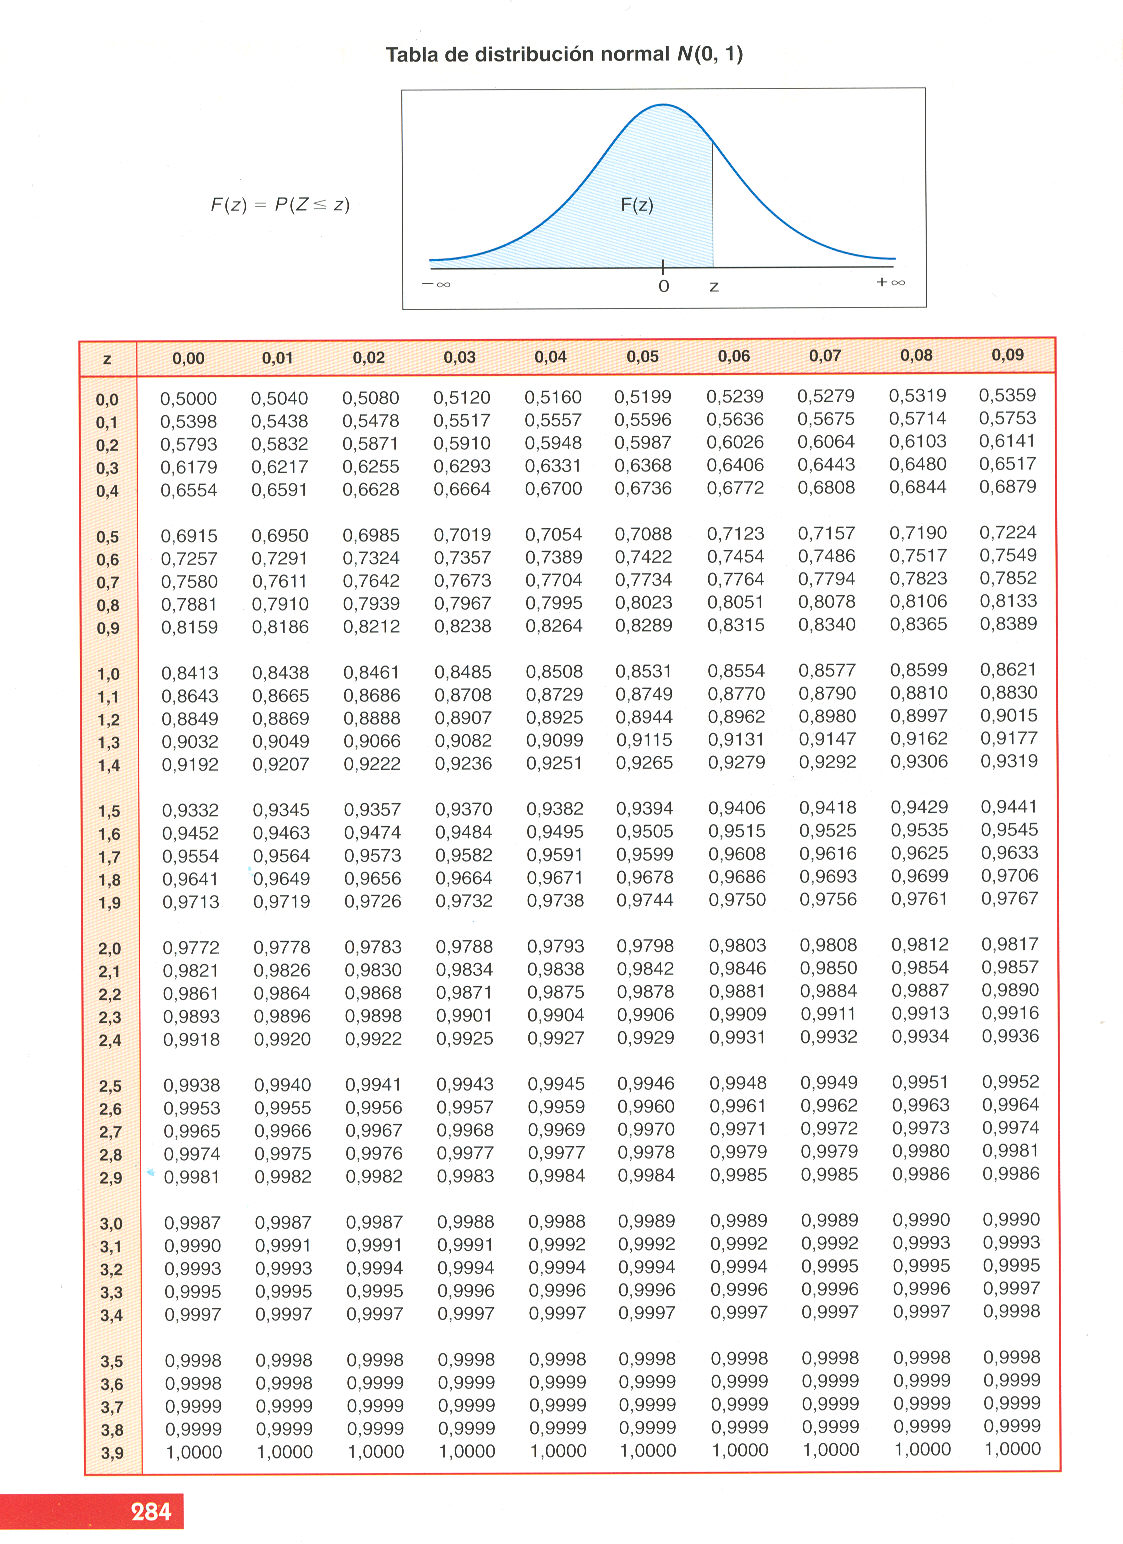